# BIOS512 Assignment #4

🌬 For this assignment we are going to work with [Canada wind turbine](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/readme.md) data from TidyTuesday. 💨

Use `read_csv` to load the data from the TidyTuesday GitHub repository. The project URL is can be found at [https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/).

In [1]:
library('tidyverse')
data4 <- read_csv('wind-turbine.csv', col_types = cols())

Warning message:
“Failed to locate timezone database”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [10]:
library('forcats')

Each row in the table represents a single turbine.

Make a bar chart 📊 **sorted by frequency** of turbine count per province territory. (Hint: `fct_infreq` will sort your factor levels by frequency for subsequent plotting)

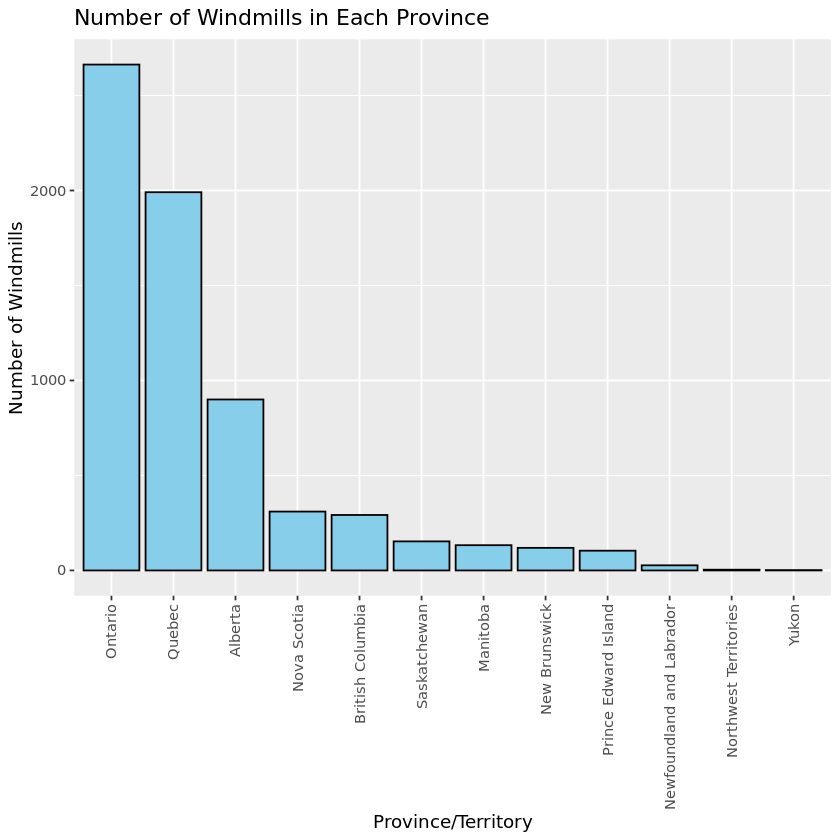

In [11]:
sortturbine <- data4 %>%
group_by(province_territory)

freqplot <- ggplot(data4, aes(x = fct_infreq(province_territory))) +geom_bar(fill = "skyblue", color = "black") +
  labs(title = "Number of Windmills in Each Province",
       x = "Province/Territory",
       y = "Number of Windmills") +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
freqplot

Make a bar chart **sorted by frequency** of turbine count per manufacturer. **Group the low frequency manufacturers into an `Other` category**.

**Bonus:** Can you force the `Other` category to be the last bar? 

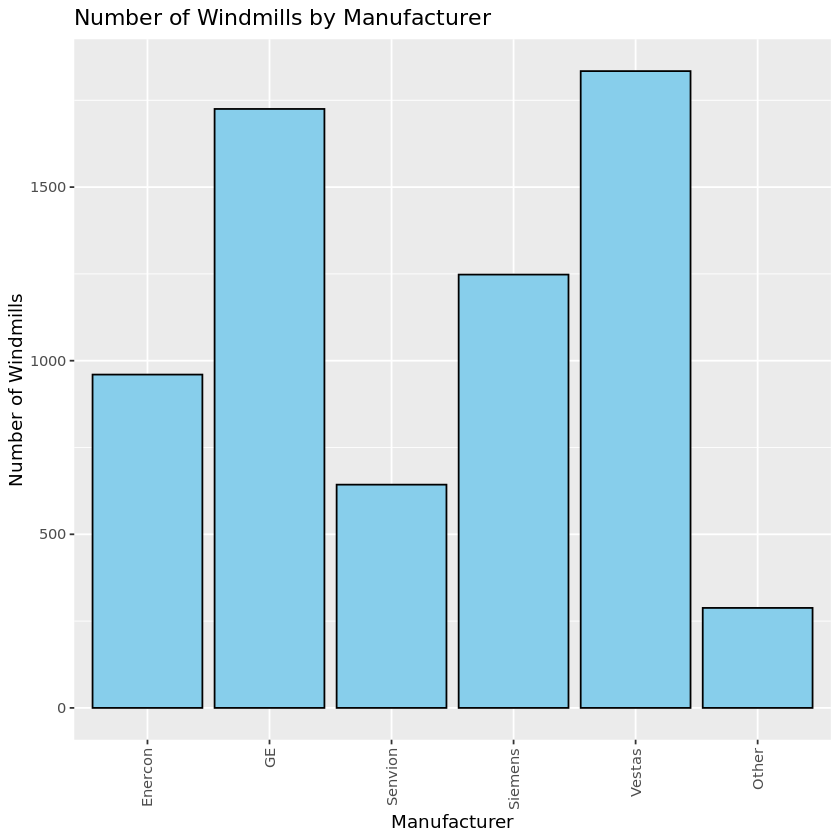

In [16]:
threshold <- 10  # Adjust as needed

# Create a bar chart for 'manufacturer' with sorted and lumped categories
data4$manufacturer <- fct_lump(data4$manufacturer, prop = 0.05)  # Lumps levels below 5% frequency

# Manually set levels with frequency below the threshold to 'other'
data4$manufacturer <- fct_other(data4$manufacturer, keep = levels(data4$manufacturer)[table(data4$manufacturer) >= threshold])

# Create a bar chart for 'manufacturer' with sorted and lumped categories
manufacturerplot <- ggplot(data4, aes(x = manufacturer)) +
  geom_bar(fill = "skyblue", color = "black") +
  labs(title = "Number of Windmills by Manufacturer",
       x = "Manufacturer",
       y = "Number of Windmills") +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1))

manufacturerplot